# Assignment 4: Interpretable ML II

Kelly Tong

Link to Google Colab: https://colab.research.google.com/drive/1dW6WlBCcDsnMWAA_guGAXFe4AdaQ5EHw#scrollTo=FW6K7FzPQm__

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kelly0604/Assignment4_InterpretableMLII/blob/main/Assignment4_InterpretableML_II.ipynb)



### Link to Github Repository

In [34]:
!git clone https://github.com/Kelly0604/Assignment4_InterpretableMLII.git
%cd /content/Assignment4_InterpretableMLII
%ls

Cloning into 'Assignment4_InterpretableMLII'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 65 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 3.61 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/Assignment4_InterpretableMLII
Assignment4_InterpretableMLII/  Iris.csv  README.md


In [35]:
# update with git pull
%cd /content/Assignment4_InterpretableMLII
!git pull

/content/Assignment4_InterpretableMLII
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (51/51), 3.54 MiB | 7.62 MiB/s, done.
From https://github.com/Kelly0604/Assignment4_InterpretableMLII
   b5de890..443f9f9  main       -> origin/main
Updating b5de890..443f9f9
Fast-forward
 Assignment4_InterpretableML_II.ipynb    | 2465 +++++++++++++++++++++++++++++++++++++++++++++++++++
 README.md                               |   16 +-
 Visualizations/FIGS Classifier.png      |  Bin 0 -> 480035 bytes
 Visualizations/Interpretable ML II.pdf  |  Bin 0 -> 908309 bytes
 Visualizations/Interpretable ML II.pptx |  Bin 0 -> 1129714 bytes
 Visualizations/Model Comparison.png     |  Bin 0 -> 403122 bytes
 Visualizations/Rule Fit Regressor.png   |  Bin 0 -> 472640 bytes
 Visualizations/Tree GAM Classifier.png  |  Bin 0 -> 450164 b

### Preparation

- Install `imodels` package in the environment if haven't already.
- Import all necessary packages including models from `imodels`
- Load and read data, prepare the data for model training


In [36]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [37]:
# install imodels
!pip install imodels

In [38]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imodels import get_clean_dataset, HSTreeClassifierCV
from imodels import RuleFitRegressor
from imodels import FIGSClassifier
from imodels import TreeGAMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [39]:
# read data
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# print datatypes
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [40]:
# prepare data
X = data.drop(['Id', 'SepalLengthCm'], axis=1)
y = data['SepalLengthCm']

le = LabelEncoder()
X['Species'] = le.fit_transform(X['Species'])

# split for regression training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fitting Models

## Rulefit Regressor

- Combines rules extracted from decision trees with linear terms for regression.
- Extracts interpretable decision rules from tree-based models.
- Uses these rules alongside linear terms to make predictions.
- Provides interpretability by allowing individual rules to be understood and analyzed.
- Effective in handling both categorical and continuous features.
- Suitable for tasks requiring a mix of linear and non-linear relationships.
- The RMSE for Rule Fit Regressor in this case is 0.322.

In [41]:
# Initialize and fit the RuleFitRegressor
rulefit = RuleFitRegressor()
rulefit.fit(X_train, y_train)

# Predict on the test set
y_pred = rulefit.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.3220695944917801


In [42]:
rulefit

RuleFitRegressor()

In [43]:
# inspect and print the rules
print('Rulefit has an alternative visualization:')
rules = rulefit._get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
display(rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis'))

Rulefit has an alternative visualization:


,rule,coef,support
1,PetalLengthCm,0.037272,1.000000
17,PetalLengthCm <= 5.15,-0.296778,0.783333
16,SepalWidthCm <= 3.85 and PetalLengthCm <= 4.55,-0.201656,0.541667
20,SepalWidthCm > 2.65 and PetalLengthCm > 4.25,0.258349,0.433333
9,PetalLengthCm <= 3.95,-0.138351,0.400000
18,SepalWidthCm <= 3.05 and PetalLengthCm <= 5.65 and PetalLengthCm > 3.75,-0.042522,0.391667
15,SepalWidthCm <= 3.9 and PetalLengthCm <= 3.95,-0.174404,0.366667
19,PetalLengthCm <= 5.45 and PetalLengthCm > 3.4 and Species <= 1.5,0.152809,0.316667
11,PetalLengthCm <= 1.65,-0.011438,0.291667
10,SepalWidthCm <= 3.65 and PetalLengthCm <= 3.4,-0.042979,0.266667


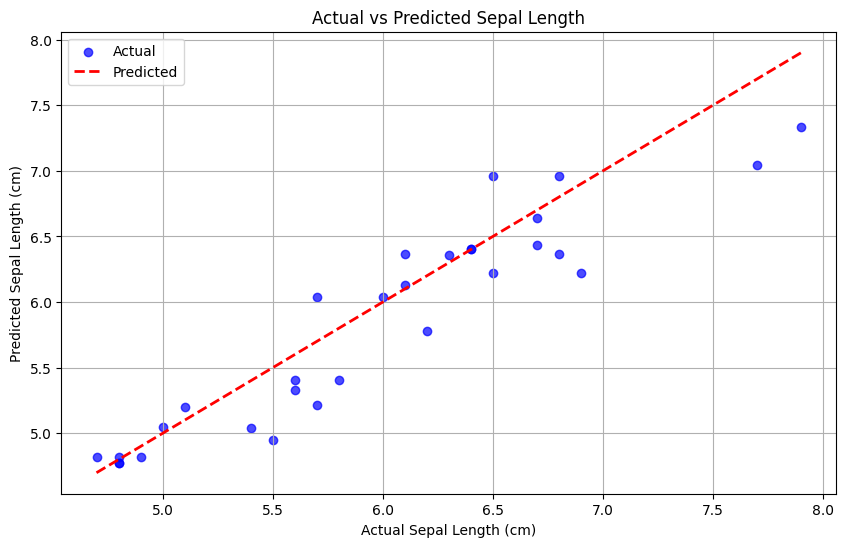

In [44]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Sepal Length')
plt.xlabel('Actual Sepal Length (cm)')
plt.ylabel('Predicted Sepal Length (cm)')
plt.legend(['Actual', 'Predicted'])
plt.grid(True)
plt.show()

## FigsClassifier

- Constructs decision rules through a greedy, interpretable process.
- Builds decision trees incrementally to minimize classification error.
- Each tree split maximizes the classification performance on a subset of data.
- Generates highly interpretable models with decision rules that can be easily understood.
- Effective in cases where interpretability is as important as accuracy.
- Produces compact models that can be efficiently evaluated.
The accuracy for FIGS Classifier in this case is 0.633.

In [45]:
# Prepare the dataset
X = data.drop(['Id', 'Species'], axis=1)  # Drop the Id and target variable columns
y = data['Species']  # Target variable

# Encode the categorical target variable (Species)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the FIGSClassifier
figs_clf = FIGSClassifier()
figs_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = figs_clf.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6333333333333333


In [46]:
figs_clf

FIGSClassifier()

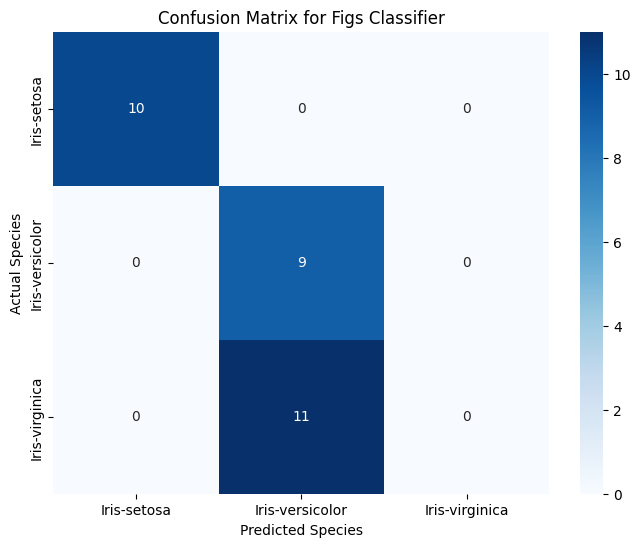

In [47]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Figs Classifier')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

Alternative visualization:


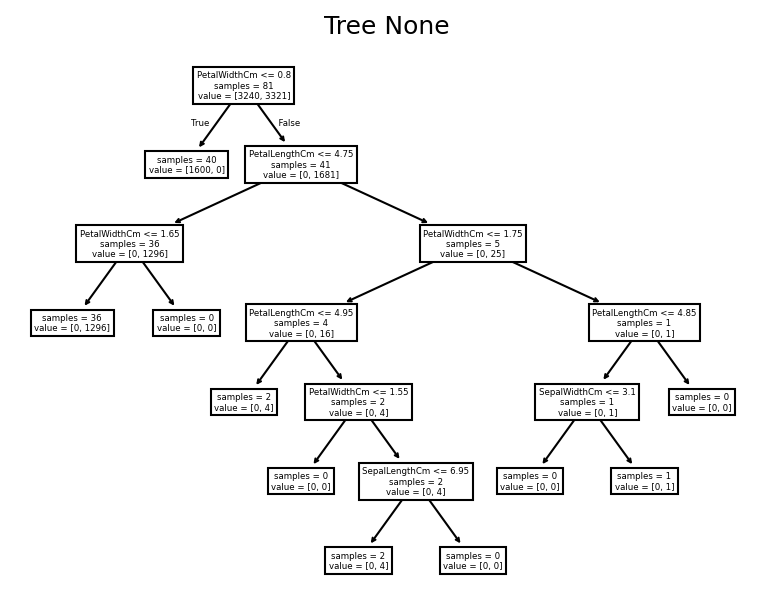

In [48]:
print('Alternative visualization:')
figs_clf.plot()

#### Tree Explanation
- Root Node (PetalWidthCm <= 0.8):
  - The first decision asks whether the petal width is less than or equal to 0.8. This splits the data into two branches:
  - Left Branch (True): If PetalWidthCm <= 0.8, it leads to the left side, containing 40 samples from class 1.
  - Right Branch (False): If PetalWidthCm > 0.8, it moves to the right, containing 41 samples that need further splitting.
- Left Subtree:
At the next split, PetalWidthCm <= 1.65, the samples are further split. If true, 36 samples are classified as class 1. If false, no samples remain in that branch.
- Right Subtree:
For samples where PetalWidthCm > 0.8, the next condition is whether PetalWidthCm <= 4.75. This branch is further split by various petal and sepal length/width conditions, classifying the remaining samples into either class 1 or class 2 based on those criteria.
- Leaf Nodes: At the bottom of the tree, each leaf node provides the final classification

## TreeGAMClassifier

- A tree-based Generalized Additive Model (GAM) for classification tasks.
- Combines tree-based models with additive components for flexibility and interpretability.
- Models the relationship between input variables and the target as a sum of non-linear functions.
- Captures non-linear relationships without sacrificing interpretability.
- Effective for datasets with complex, non-linear interactions.
- Suitable for tasks that require balancing accuracy and model interpretability.
The accuracy for Tree GAM Classifier in this case is 0.633.


In [49]:
# initialize and fit the TreeGAMClassifier
tree_gam_clf = TreeGAMClassifier()
tree_gam_clf.fit(X_train, y_train)

# predict on test set
y_pred = tree_gam_clf.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6333333333333333


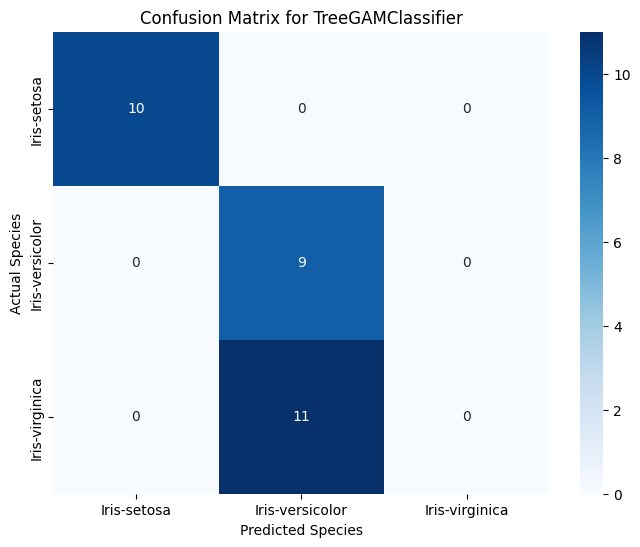

In [50]:
# confusion matrix
cm_treegamclf = confusion_matrix(y_test, y_pred)

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_treegamclf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for TreeGAMClassifier')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

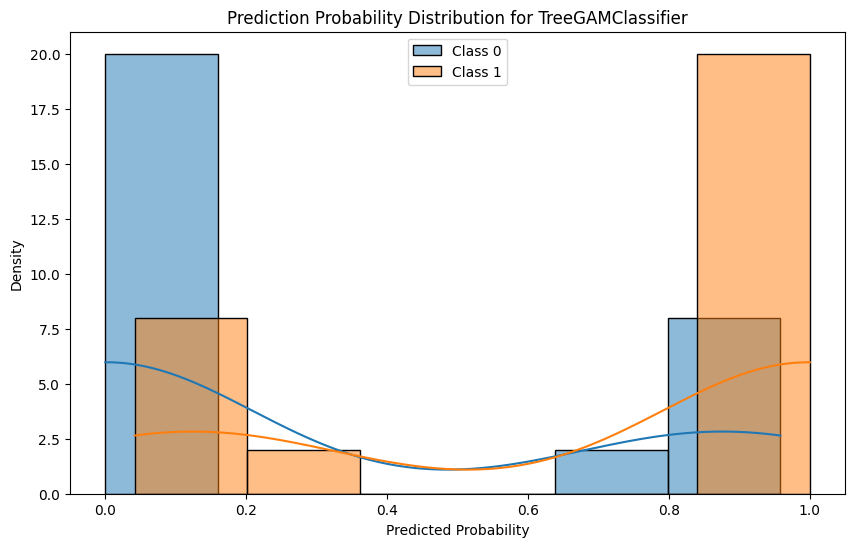

In [51]:
y_prob = tree_gam_clf.predict_proba(X_test)

# Create a probability distribution plot for each class
plt.figure(figsize=(10, 6))

for i in range(y_prob.shape[1]):
    sns.histplot(y_prob[:, i], label=f'Class {i}', kde=True)

plt.title('Prediction Probability Distribution for TreeGAMClassifier')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

# Prediction Probability Distribution for Tree GAM Classifier:

- Probability Distribution Peaks at 0 and 1:
  - For Class 0 (blue bars), we see that most of the predicted probabilities are concentrated at 0 and 1. This suggests that the model is confident in its predictions, assigning high or low probabilities (close to 0 or 1) rather than probabilities in the middle.
  - The same applies to Class 1 (orange bars), where most predictions are concentrated at probability values close to 1 (for Class 1) or close to 0 (for Class 0).

- Lower Density at Intermediate Values: There are very few instances where the model assigns probabilities between 0.4 and 0.6.
